In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

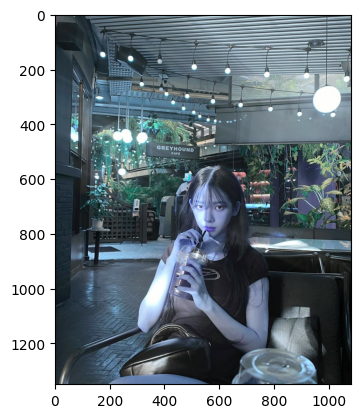

In [64]:
my_image_path = './data/karina.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()

rectangles[[(494, 666) (648, 821)]]


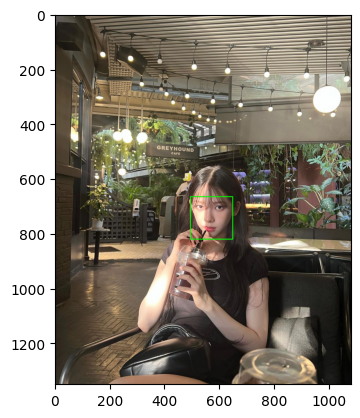

In [38]:
# 얼굴 감지기
detector_hog = dlib.get_frontal_face_detector()

# 이미지 피라미드(작게 촬영된걸 크게 보기위함)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  
print(dlib_rects)

# 찾은 얼굴 영역 박스로 감싸기
# 리스트에 감싸져있으니 for문으로 풀어준다.
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [39]:
# landmark 지정
model_path = './data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

# 랜드마크 위치 저장
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


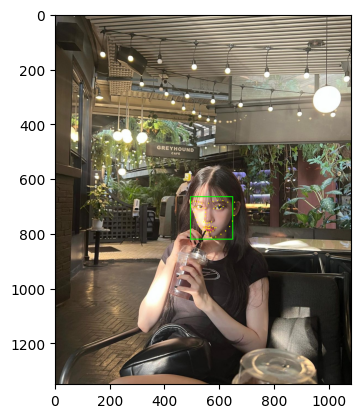

In [40]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [41]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[34]) # 코의 index는 34 입니다
    x = landmark[34][0] # 이미지에서 코 부위의 x값
    y = landmark[34][1] # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(562, 761)
(x,y) : (562,761)
(w,h) : (155,155)


In [42]:
# 고양이 수염을 얼굴 크기에 맞게 리사이즈

sticker_path = "./data/cat-whiskers.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape) # 사이즈를 조정한 고양이 수염 이미지의 차원 확인

(155, 155, 3)


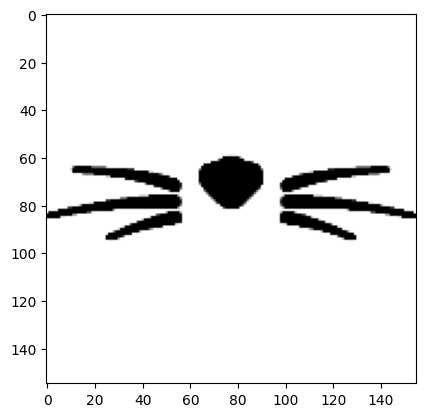

In [8]:
plt.imshow(img_sticker)
plt.show()

In [43]:
refined_x = x - w//2
refined_y = y - h//2
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (485,684)


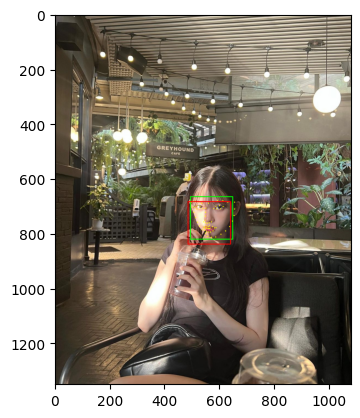

In [44]:
# 이미지가 정확히 어디 들어가는지 확인
cv2.rectangle(img_show, (refined_x, refined_y), (refined_x+img_sticker.shape[0], refined_y+img_sticker.shape[1]), (0,0,255), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

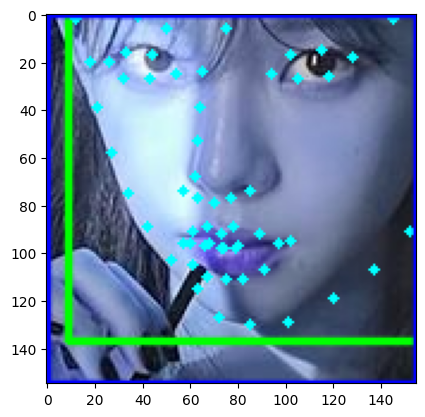

In [29]:
# img_show[681:681+155, 493:493+155]
# img_show[681:836, 493:594]
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(sticker_area)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

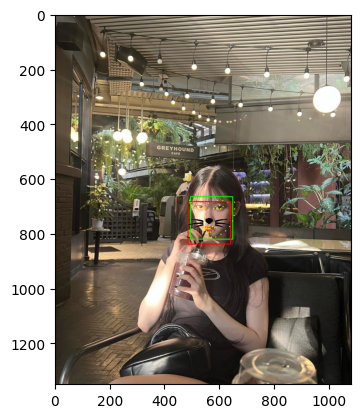

In [12]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

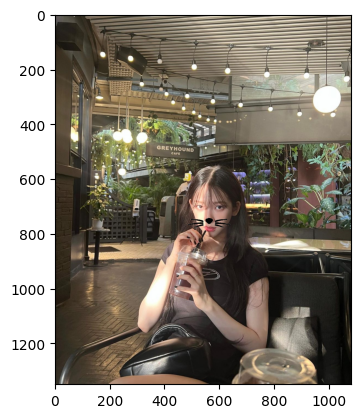

In [34]:
# 완성작품을보자
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 투명하게해보자

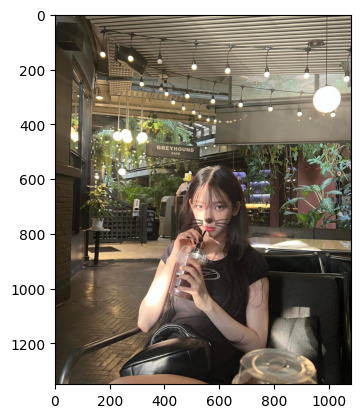

In [65]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 다양한 이미지 처리를 통해 오류를 보자

In [14]:
import seaborn as sns

def my_image_catpilter(my_img_path, cat_pilter_path, model_path):
    img_bgr = cv2.imread(my_img_path)
    img_show = img_bgr.copy()
    
    # 얼굴 감지 부분
    detector_hog = dlib.get_frontal_face_detector()
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)

    # 찾은 얼굴 영역 박스로 감싸기
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    # img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []

    for dlib_rect in dlib_rects:
        
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)

    # img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
        x = landmark[34][0] # 코 부위의 x값
        y = landmark[34][1] # 코 부위의 y값
        w = h = dlib_rect.width()
        
    # 고양이 수염을 얼굴 크기에 맞게 리사이즈
    img_sticker = cv2.imread(cat_pilter_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    refined_x = x - w//2
    refined_y = y - h//2
    print (f'(x,y) : ({refined_x},{refined_y})')
    
    # 음수일 경우
    if refined_x < 0: 
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0
        
    # 이미지가 정확히 어디 들어가는지 확인
    
    cv2.rectangle(img_show, (refined_x, refined_y), (refined_x+img_sticker.shape[0], refined_y+img_sticker.shape[1]), (0,0,255), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 1)
    plt.imshow(img_show_rgb)
    
    # 완성작품을보자
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()


(x,y) : (485,684)


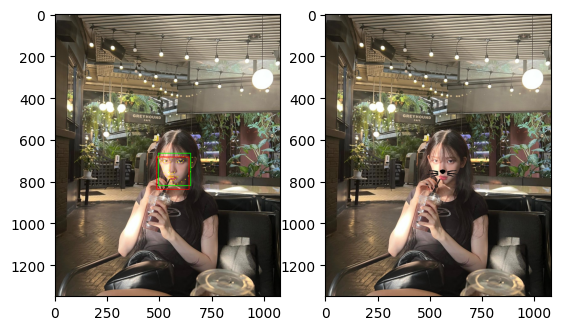

In [66]:
my_image_catpilter("./data/karina.jpg", "./data/cat-whiskers.png", "./data/shape_predictor_68_face_landmarks.dat")

(x,y) : (334,258)


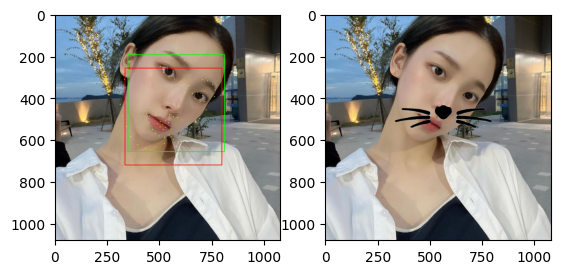

In [16]:
my_image_catpilter("./data/karina2.jpg", "./data/cat-whiskers.png", "./data/shape_predictor_68_face_landmarks.dat")

(x,y) : (304,225)


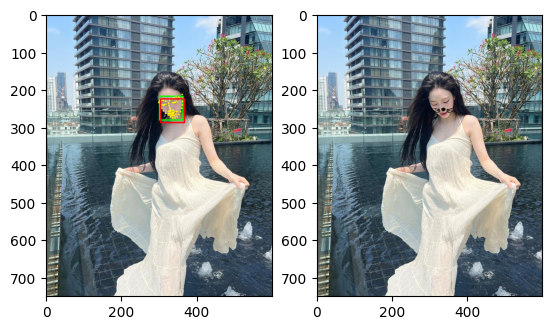

In [17]:
my_image_catpilter("./data/karina3.jpg", "./data/cat-whiskers.png", "./data/shape_predictor_68_face_landmarks.dat")

(x,y) : (177,219)


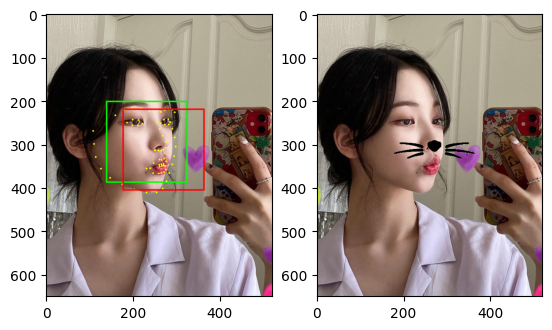

In [18]:
my_image_catpilter("./data/karina4.jpg", "./data/cat-whiskers.png", "./data/shape_predictor_68_face_landmarks.dat")


(x,y) : (302,199)


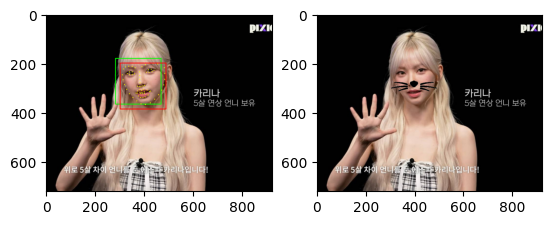

In [19]:
my_image_catpilter("./data/karina5.jpg", "./data/cat-whiskers.png", "./data/shape_predictor_68_face_landmarks.dat")

## 현재 발견된 문제점
### 1. 얼굴각도에 따라 붙는 스티커가 같은 각도 형태로 돌아갈 필요가 있다.
### 2. 너무 멀면 인식이 잘 안될 수 있다.

## 대략적인 문제점
### 1. 실행속도가 관계가 있을까?
실행속도 또한 중요하다. 지금이야 사진이지만 이러한 필터는 영상으로 전송시 시간이 오래걸리면 사용자 측면 퍼포먼스가 떨어진다.
### 2. 스티커앱을 만들 떄 정확도가 중요한가?
정확한 위치에 올라가지않으면 사용할 이유가 없다.